In [1]:
# Import that good good
import sys
import os
sys.path.append('/Users/kolbt/Desktop/ipython/diam_files')
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import math
from IPython.display import display
from collections import OrderedDict
pd.options.display.max_rows = 2
import matplotlib.colors as mc
import colorsys
import matplotlib.font_manager as font_manager
from scipy.optimize import curve_fit
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
# Figure dimensions (inches)
# 2 x 1.8

In [2]:
#Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

In [27]:
# Functions will all go here
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)

def doSort(arr):
    for i in xrange(len(arr)):
        for j in xrange(len(arr)):
            if arr[i] < arr[j] and i > j:
                tmp = arr[i]
                arr[i] = arr[j]
                arr[j] = tmp
                
def slowSort(array):
    """Sort an array the slow (but certain) way"""
    cpy = np.copy(array)
    ind = np.arange(0, len(array))
    for i in xrange(len(cpy)):
        for j in xrange(len(cpy)):
            if cpy[i] > cpy[j] and i < j:
                # Swap the copy array values
                tmp = cpy[i]
                cpy[i] = cpy[j]
                cpy[j] = tmp
                # Swap the corresponding indices
                tmp = ind[i]
                ind[i] = ind[j]
                ind[j] = tmp
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]
            
def chkSort(array):
    """Make sure array is chronilogical"""
    for i in xrange(len(array)-2):
        if array[i] > array[i+1]:
            print("{} is not greater than {} for indices=({},{})").format(array[i+1], array[i], i, i+1)
            return False
    return True

# This will find my installation of whingdingdilly wherever it is installed
def find(name):
    home = os.path.expanduser("~")
    for root, dirs, files in os.walk(home):
        if name in dirs:
            return os.path.join(root, name)
        
def computeTauPerTstep(epsilon):
    sigma = 1.0
    threeEtaPiSigma = 1.0
    runFor = 200
    tauBrown = 1.0
    
    tauLJ = ((sigma**2) * threeEtaPiSigma) / epsilon
    dt = 0.00001 * tauLJ
    simLength = runFor * tauBrown
    totTsteps = int(simLength / dt)
    tstepPerTau = int(totTsteps / float(simLength))
    return tstepPerTau

def linearRel(m, x, b):
    return b * (x**m)
    
    

In [4]:
# Get the relevant paths
whingPath = find('whingdingdilly')
ipyPath = whingPath + '/ipython'
ratioPath = ipyPath + '/activity_ratio'
dataPath = ratioPath + '/searchRad1.005'

# Go to the correct parent directory
os.chdir(ratioPath)
txtFiles = os.listdir(dataPath)
numFiles = len(txtFiles)
all_sims = []

In [5]:
# You want to load the data in so that it's sorted to begin with
paList = []
for i in xrange(numFiles):
    paList.append(getFromTxt(txtFiles[i], "pa", "_pb"))
indArr = slowSort(paList)
indSort(txtFiles, indArr)

In [6]:
# Using the absolute path means I can go to whatever directory I want
os.chdir(dataPath)
for i in xrange(numFiles):
    df = pd.read_csv(txtFiles[i], sep='\s+', header=0)
    all_sims.append(df)
    
# Return to root directory
os.chdir(ratioPath)

In [7]:
# Check to see if timesteps are in order
for i in xrange(numFiles):
    myBool = chkSort(all_sims[i]['Timestep'])
    if myBool is False:
        print("Source files are not chronilogically sorted!")
        exit(1)
    else:
        print("{} sorted... ").format(txtFiles[i])

diam_pa0_pb500_xa50_ep82.txt sorted... 
diam_pa50_pb500_xa50_ep82.txt sorted... 
diam_pa100_pb500_xa50_ep82.txt sorted... 
diam_pa150_pb500_xa50_ep82.txt sorted... 
diam_pa200_pb500_xa50_ep82.txt sorted... 
diam_pa250_pb500_xa50_ep82.txt sorted... 
diam_pa300_pb500_xa50_ep82.txt sorted... 
diam_pa350_pb500_xa50_ep82.txt sorted... 
diam_pa400_pb500_xa50_ep82.txt sorted... 
diam_pa450_pb500_xa50_ep82.txt sorted... 
diam_pa500_pb500_xa50_ep82.txt sorted... 


In [8]:
# Make an additional frame that gives total number of particles, and simulation parameters
paramList = []
for i in xrange(numFiles):
    partAll = all_sims[i]['Gas_tot'][0]
    partA = all_sims[i]['Gas_A'][0]
    partB = all_sims[i]['Gas_B'][0]
    pa = getFromTxt(txtFiles[i], "pa", "_pb")
    pb = getFromTxt(txtFiles[i], "pb", "_xa")
    xa = getFromTxt(txtFiles[i], "xa", "_ep")
    ep = getFromTxt(txtFiles[i], "ep", ".txt")
    converT = computeTauPerTstep(ep)
    
    try:
        prat = float(pa)/float(pb)
    except:
        prat = 0.0
    paramList.append((partAll, partA, partB, pa, pb, xa, prat, ep, converT))

params = pd.DataFrame(paramList, columns=['partAll', 'partA', 'partB', 'peA', 'peB', 'xA', 'peR', 'eps', 'brownTime'])
display(params)

,partAll,partA,partB,peA,peB,xA,peR,eps,brownTime
0,100000,50000,50000,0.0,500.0,50.0,0.0,82.0,8199999
...,...,...,...,...,...,...,...,...,...
10,100000,50000,50000,500.0,500.0,50.0,1.0,82.0,8199999


In [9]:
# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
for i in xrange(numFiles):
    SS.loc[i] = [0] * len(headers)

# Make dataframe of steady-state data
for i in xrange(numFiles):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(headers) + 1):
        # Compute mean of last 100 entries in jth column of ith file
        avg = np.mean(all_sims[i].iloc[-20:-1,j])
        SS[headers[j-1]][i] = avg
        
# Normalize by number of particles
SS['Gas_A'][:] /= params['partA'][:] 
SS['Gas_B'][:] /= params['partB'][:] 
SS['Gas_tot'][:] /= params['partAll'][:]
SS['Dense_A'][:] /= params['partA'][:] 
SS['Dense_B'][:] /= params['partB'][:] 
SS['Dense_tot'][:] /= params['partAll'][:] 
SS['Lg_clust'][:] /= params['partAll'][:] 
SS['MCS'][:] /= params['partAll'][:]

SS['Gas_A'][:] *= 100.0
SS['Gas_B'][:] *= 100.0
SS['Gas_tot'][:] *= 100.0
SS['Dense_A'][:] *= 100.0
SS['Dense_B'][:] *= 100.0
SS['Dense_tot'][:] *= 100.0
SS['Lg_clust'][:] *= 100.0
SS['MCS'][:] *= 100.0
display(SS)

,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,37.2443,5.88695,21.5656,62.7557,94.1131,78.4344,77.8079,63.895,1.00024,1.00026,1.00027,1.00021,0.6,61138.1,61630.4,1.27,1.27,0.311053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1.95147,1.93768,1.94458,98.0485,98.0623,98.0554,98.0554,98.0554,1.00006,1.00003,1.00009,1.00006,0.6,77019.5,77019.5,1.27,1.27,0.0368421


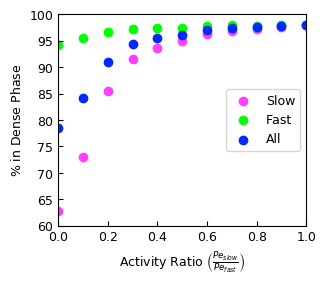

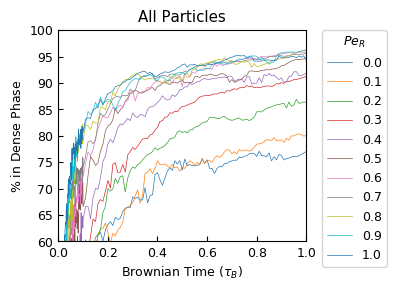

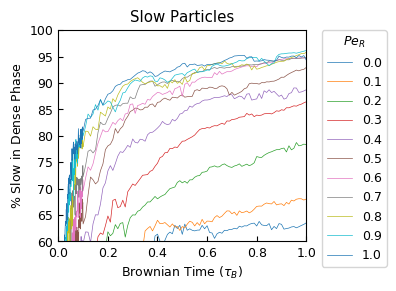

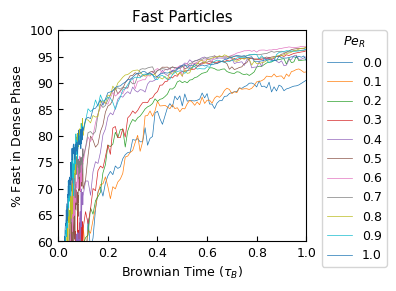

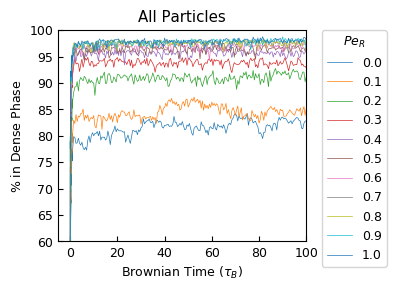

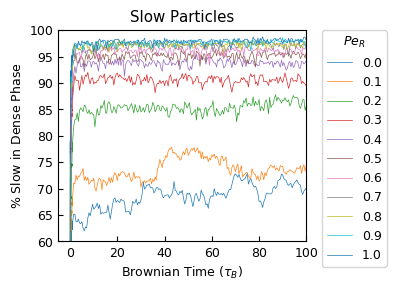

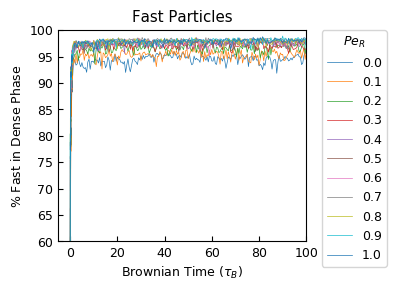

In [10]:
# Let's make plots without the plotter function

################################# Percent in dense phase #####################################
# SS
for i in xrange(numFiles):
    plt.scatter(params['peR'][i], SS['Dense_A'][i], c='#FF40FF', label='Slow')
    plt.scatter(params['peR'][i], SS['Dense_B'][i], c='#00FF00', label='Fast')
    plt.scatter(params['peR'][i], SS['Dense_tot'][i], c='#0029FF', label='All')
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc=7)
plt.xlabel(r'Activity Ratio $\left( \frac{Pe_{slow}}{Pe_{fast}} \right)$')
plt.xlim(0, 1.0)
plt.ylabel(r'$\%$ in Dense Phase')
plt.ylim(60, 100)
plt.show()
# vs time
# All
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_tot'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(0, 1.0)
plt.ylabel(r'$\%$ in Dense Phase')
plt.ylim(60, 100)
plt.title('All Particles')
plt.show()
# A-type
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_A'] * 100.0 / params['partA'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(0, 1.0)
plt.ylabel(r'$\%$ Slow in Dense Phase')
plt.ylim(60, 100)
plt.title('Slow Particles')
plt.show()
# B-type
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_B'] * 100.0 / params['partB'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(0, 1.0)
plt.ylabel(r'$\%$ Fast in Dense Phase')
plt.ylim(60, 100)
plt.title('Fast Particles')
plt.show()

# Now all time
# All
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_tot'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(-5, 100.0)
plt.ylabel(r'$\%$ in Dense Phase')
plt.ylim(60, 100)
plt.title('All Particles')
plt.show()
# A-type
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_A'] * 100.0 / params['partA'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(-5, 100.0)
plt.ylabel(r'$\%$ Slow in Dense Phase')
plt.ylim(60, 100)
plt.title('Slow Particles')
plt.show()
# B-type
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_B'] * 100.0 / params['partB'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(-5, 100.0)
plt.ylabel(r'$\%$ Fast in Dense Phase')
plt.ylim(60, 100)
plt.title('Fast Particles')
plt.show()


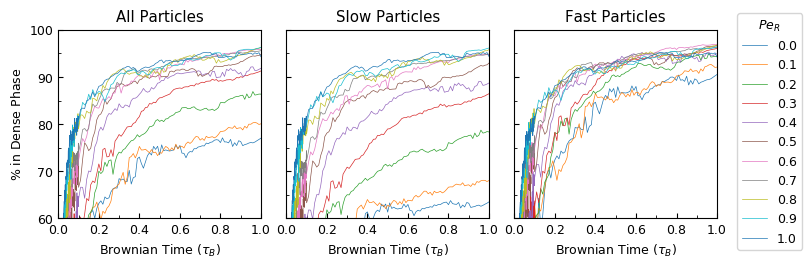

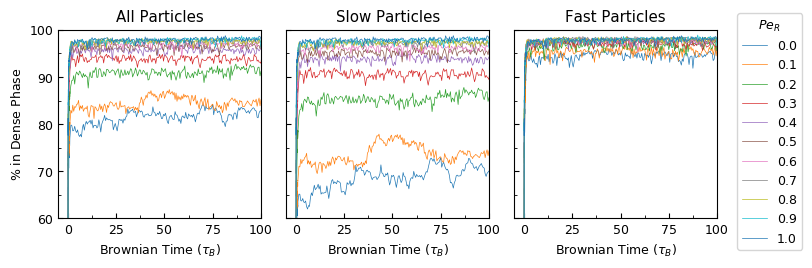

In [11]:
# Time resolved data side-by-side
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8.5,2.5), sharey=True)
for i in xrange(numFiles):
    ax1.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_tot'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
    ax2.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_A'] * 100.0 / params['partA'][i],
             label=str(params['peR'][i]))
    ax3.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_B'] * 100.0 / params['partB'][i],
             label=str(params['peR'][i]))
ax1.legend(loc = 4, bbox_to_anchor=(3.7, -0.2), title=r'$Pe_{R}$')
ax1.set_xlabel(r'Brownian Time $(\tau_{B})$')
ax2.set_xlabel(r'Brownian Time $(\tau_{B})$')
ax3.set_xlabel(r'Brownian Time $(\tau_{B})$')
ax1.set_ylabel(r'$\%$ in Dense Phase')
ax1.set_xlim(0, 1.0)
ax2.set_xlim(0, 1.0)
ax3.set_xlim(0, 1.0)
ax1.set_title('All Particles')
ax2.set_title('Slow Particles')
ax3.set_title('Fast Particles')
plt.ylim(60, 100)
plt.subplots_adjust(wspace = 0.125)
minorLocator = MultipleLocator(0.1)
ax1.xaxis.set_minor_locator(minorLocator)
ax2.xaxis.set_minor_locator(minorLocator)
ax3.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(5)
ax1.yaxis.set_minor_locator(minorLocator)
ax2.yaxis.set_minor_locator(minorLocator)
ax3.yaxis.set_minor_locator(minorLocator)
plt.show()

# Increase the observed time
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8.5,2.5), sharey=True)
for i in xrange(numFiles):
    ax1.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_tot'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
    ax2.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_A'] * 100.0 / params['partA'][i],
             label=str(params['peR'][i]))
    ax3.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_B'] * 100.0 / params['partB'][i],
             label=str(params['peR'][i]))
ax1.legend(loc = 4, bbox_to_anchor=(3.7, -0.2), title=r'$Pe_{R}$')
ax1.set_xlabel(r'Brownian Time $(\tau_{B})$')
ax2.set_xlabel(r'Brownian Time $(\tau_{B})$')
ax3.set_xlabel(r'Brownian Time $(\tau_{B})$')
ax1.set_ylabel(r'$\%$ in Dense Phase')
ax1.set_xlim(-5, 100)
ax2.set_xlim(-5, 100)
ax3.set_xlim(-5, 100)
ax1.set_title('All Particles')
ax2.set_title('Slow Particles')
ax3.set_title('Fast Particles')
plt.ylim(60, 100)
plt.subplots_adjust(wspace = 0.125)
minorLocator = MultipleLocator(12.5)
ax1.xaxis.set_minor_locator(minorLocator)
ax2.xaxis.set_minor_locator(minorLocator)
ax3.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(5)
ax1.yaxis.set_minor_locator(minorLocator)
ax2.yaxis.set_minor_locator(minorLocator)
ax3.yaxis.set_minor_locator(minorLocator)
plt.show()


In [12]:
################################## Percent in gas phase ######################################
# SS

# vs time

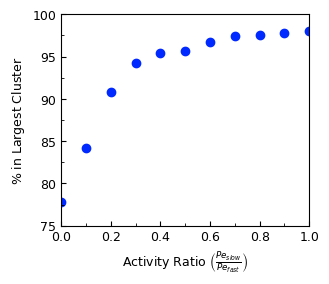

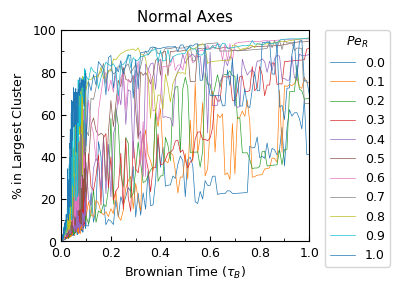

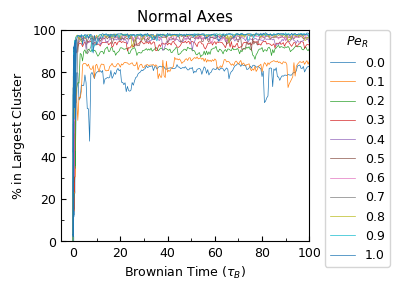

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


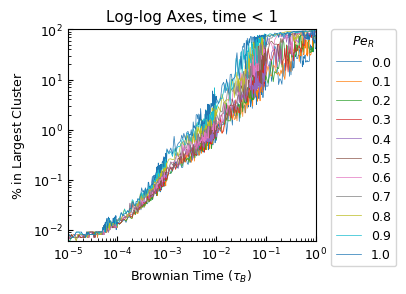

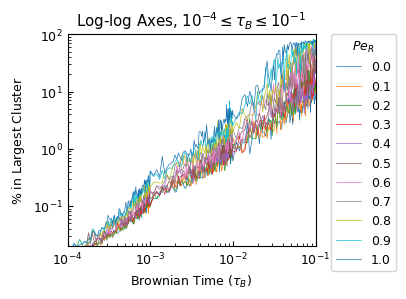

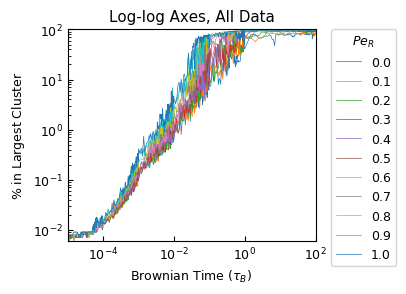

In [13]:
# Largest cluster ############################################################################
# SS
# SS
for i in xrange(numFiles):
    plt.scatter(params['peR'][i], SS['Lg_clust'][i], c='#0029FF')
    
plt.xlabel(r'Activity Ratio $\left( \frac{Pe_{slow}}{Pe_{fast}} \right)$')
plt.xlim(0, 1.0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(75, 100)
ax = plt.gca()
minorLocator = MultipleLocator(0.1)
ax.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(2.5)
ax.yaxis.set_minor_locator(minorLocator)
plt.show()

# vs time
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(0, 1.0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(0, 100)
ax = plt.gca()
minorLocator = MultipleLocator(0.1)
ax.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minorLocator)
plt.title('Normal Axes')
plt.show()

# at longer times...
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(-5, 100.0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(0, 100)
ax = plt.gca()
minorLocator = MultipleLocator(10)
ax.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minorLocator)
plt.title('Normal Axes')
plt.show()

# Now let's use some log axes...
# Short
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(0, 1.0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(0, 100)
ax = plt.gca()
plt.title('Log-log Axes, time < 1')
plt.show()

# 10^-4 through 10^-1
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-4, 10**-1)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(10**-1 / 5, 100)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-4} \leq \tau_{B} \leq 10^{-1}$')
plt.show()

# Long
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(-5, 100.0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(0, 100)
ax = plt.gca()
plt.title('Log-log Axes, All Data')
plt.show()

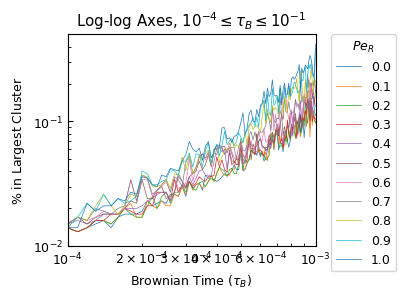

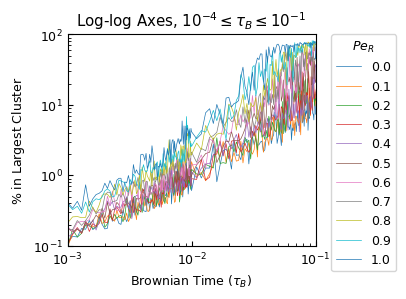

In [101]:
# Fit each regime separately
# First 10^-4 through 10^-3
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-4, 10**-3)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(10**-2, 5*10**-1)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-4} \leq \tau_{B} \leq 10^{-1}$')
plt.show()

# Then 10^-3 through 10^-1
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-3, 10**-1)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(10**-1, 10**2)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-4} \leq \tau_{B} \leq 10^{-1}$')
plt.show()

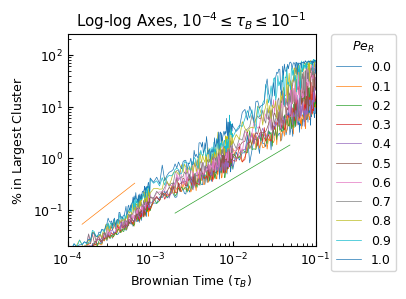

In [95]:
# Let's put lines on this bitch
# 10^-4 through 10^-1
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-4, 10**-1)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(10**-1 / 5, 250)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-4} \leq \tau_{B} \leq 10^{-1}$')
# plt.show()

# Get x data, evaluate function, plot line
xs = np.arange(1.5*10**-4, 7*10**-4, 10**-4)
ys = np.zeros_like(xs)
for i in xrange(len(xs)):
    ys[i] = linearRel(1.25, xs[i], 10**3.5) 
plt.loglog(xs, ys)

xs = np.arange(2*10**-3, 5*10**-2, 10**-3)
ys = np.zeros_like(xs)
for i in xrange(len(xs)):
    ys[i] = linearRel(0.95, xs[i], 10**1.5) 
plt.loglog(xs, ys)

plt.show()

In [15]:
%%capture
# Let's throw some lines on this data (and maybe normalize it)

# First let's go through and get the nucleation time
percThresh = 5
nucTime = []
for i in xrange(numFiles):
    for j in xrange(len(all_sims[i]['Lg_clust'])):
        curPerc = all_sims[i]['Lg_clust'][j] * 100.0 / float(params['partAll'][i])
        if curPerc >= percThresh:
            nucTime.append(all_sims[i]['Timestep'][j])
            break

reNorm = min(nucTime)
normNucTime = []
for i in xrange(numFiles):
    normNucTime.append(nucTime[i]/float(reNorm))
    
plt.plot(params['peR'], normNucTime)
plt.xlabel(r'Activity Ratio $\left( \frac{Pe_{slow}}{Pe_{fast}} \right)$')
plt.ylabel('Renormalization Constant')
plt.show()

# Now let's use this to normalize largest cluster relationship
# 10^-4 through 10^-1
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i] / normNucTime[i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-5, 10**0)
plt.ylabel(r'$\%$ in Largest Cluster')
# plt.ylim(10**-1 / 5, 100)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-4} \leq \tau_{B} \leq 10^{-1}$')
plt.show()

# Method two: just subtract the difference in nucleation time
subtractNuc = []
for i in xrange(numFiles):
    subtractNuc.append(nucTime[i] - reNorm)

# Subtract nucleation time
for i in xrange(numFiles):
    plt.loglog((all_sims[i]['Timestep'] - subtractNuc[i]) / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-5, 10**0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(10**0, 100)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-4} \leq \tau_{B} \leq 10^{-1}$')
plt.show()
    

In [16]:
# Mean Cluster Size ##########################################################################
# SS

# vs time

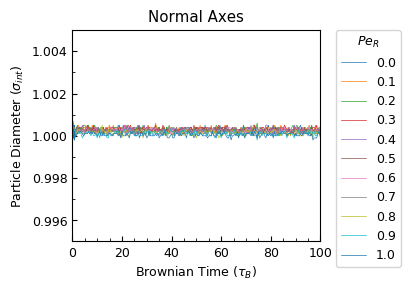

In [17]:
# Diameter: ALL, AA, AB, BB ##################################################################
# SS
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['sigALL'],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(0, 100.0)
plt.ylabel(r'Particle Diameter $(\sigma_{int})$')
plt.ylim(0.995, 1.005)
ax = plt.gca()
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(0.001)
ax.yaxis.set_minor_locator(minorLocator)
plt.title('Normal Axes')
plt.show()

# vs time

In [18]:
# Largest cluster area #######################################################################
# SS

# vs time

In [19]:
# Largest cluster density ####################################################################
# SS

# vs time